Importing Required Libraries

In [1]:
import networkx as nx
from community import community_louvain
import matplotlib.pyplot as plt
import json


 Load Preprocessed Email Data

In [2]:
# Load preprocessed email data
email_graph = nx.read_gml('data/email_graph.gml')
with open('data/email_labels.json', 'r') as f:
    email_labels = json.load(f)

print("Email network and labels loaded.")


Email network and labels loaded.


Community Detection Using Louvain Method

In [3]:
def detect_communities_louvain(G):
    """
    Detect communities in the graph using the Louvain method.

    Parameters:
    G (networkx.Graph): The network graph.

    Returns:
    partition (dict): Dictionary where keys are nodes and values are community numbers.
    """
    partition = community_louvain.best_partition(G)
    return partition

# Detect communities
email_partition = detect_communities_louvain(email_graph)
print("Communities detected in Email network.")


Communities detected in Email network.


 Calculate Modularity

In [4]:
def calculate_modularity(G, partition):
    """
    Calculate modularity of the partitioned graph.

    Parameters:
    G (networkx.Graph): The network graph.
    partition (dict): Dictionary where keys are nodes and values are community numbers.

    Returns:
    modularity (float): Modularity score.
    """
    modularity = community_louvain.modularity(partition, G)
    return modularity

# Calculate modularity
email_modularity = calculate_modularity(email_graph, email_partition)
print(f"Email dataset modularity: {email_modularity}")


Email dataset modularity: 0.41516971441301526


Visualize Communities

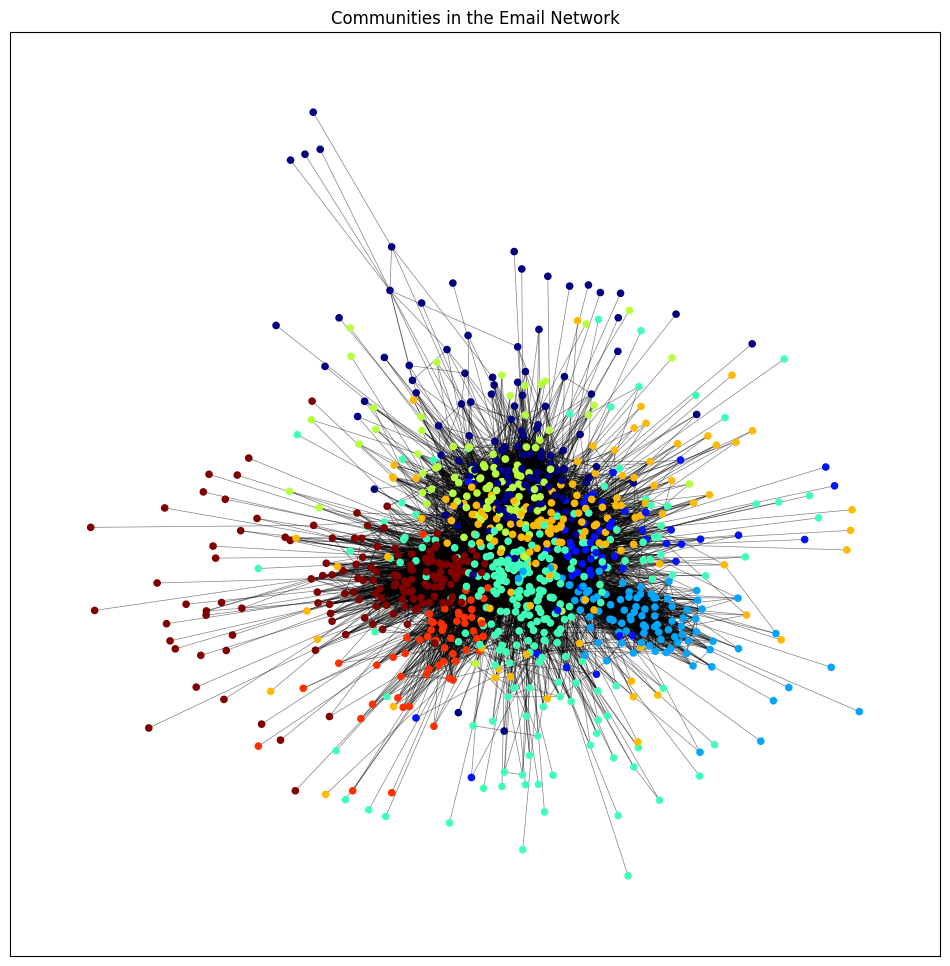

In [5]:
def visualize_communities(G, partition, title):
    """
    Visualize communities in the graph.

    Parameters:
    G (networkx.Graph): The network graph.
    partition (dict): Dictionary where keys are nodes and values are community numbers.
    title (str): Title of the plot.
    """
    pos = nx.spring_layout(G, seed=42)  # Fixed seed for reproducibility
    plt.figure(figsize=(12, 12))
    nx.draw_networkx_edges(G, pos, alpha=0.5, edge_color='k', width=0.5)

    colors = [partition[node] for node in G.nodes()]
    nx.draw_networkx_nodes(G, pos, node_color=colors, node_size=20, cmap=plt.cm.jet)

    plt.title(title)
    plt.show()

# Visualize communities
visualize_communities(email_graph, email_partition, 'Communities in the Email Network')


In [7]:
from sklearn.metrics import adjusted_mutual_info_score, normalized_mutual_info_score

# True labels for nodes in the email graph, extracted from email_labels
true_labels_email = [email_labels[str(node)] for node in email_graph.nodes()]

# Detected communities using the Louvain method
louvain_labels = [email_partition[node] for node in email_graph.nodes()]

# Calculate AMI and NMI
ami_email = adjusted_mutual_info_score(true_labels_email, louvain_labels)
nmi_email = normalized_mutual_info_score(true_labels_email, louvain_labels)

print(f"AMI score for Email dataset: {ami_email}")
print(f"NMI score for Email dataset: {nmi_email}")


AMI score for Email dataset: 0.5642299953086297
NMI score for Email dataset: 0.589714270264684


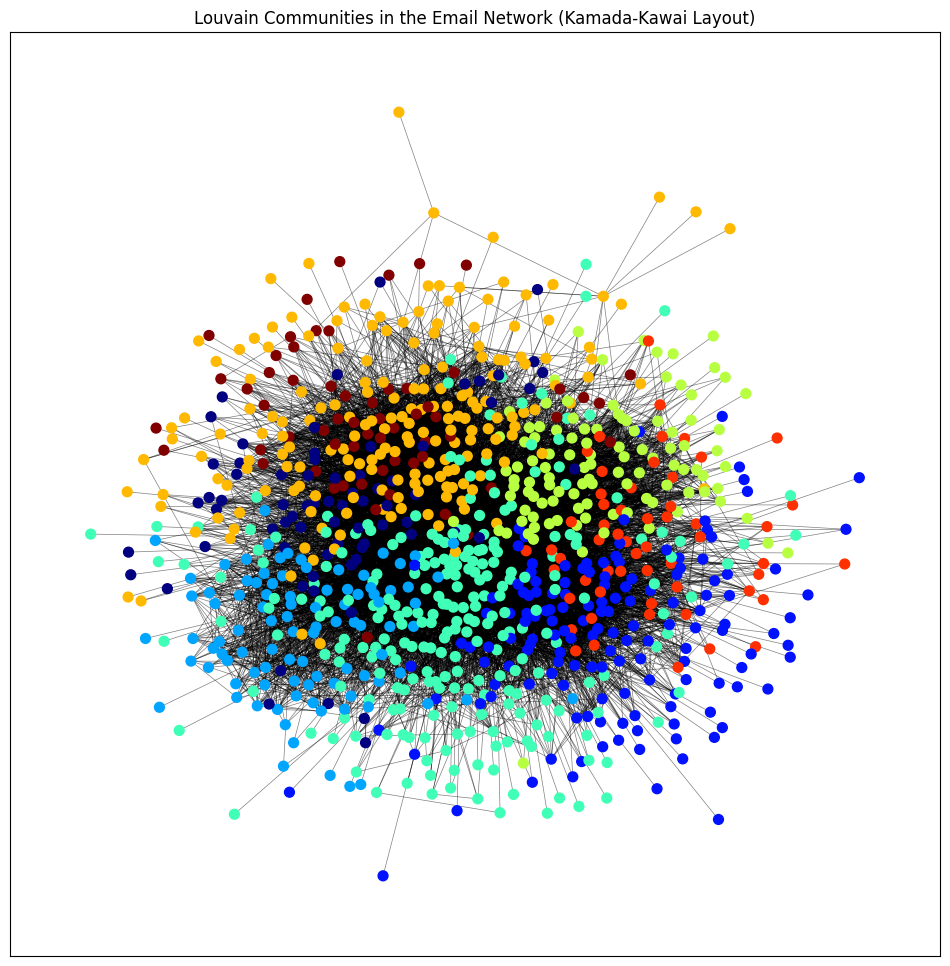

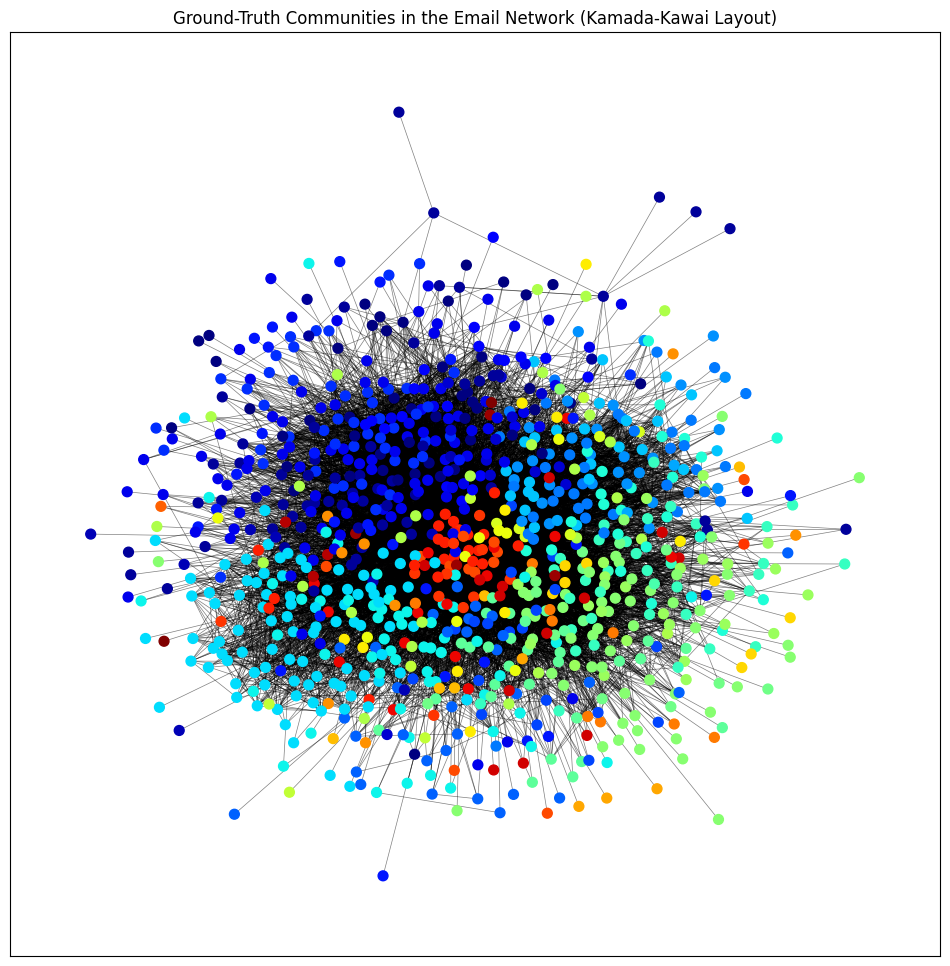

In [8]:
import networkx as nx
from community import community_louvain
import matplotlib.pyplot as plt
import json

# Load preprocessed email data
email_graph = nx.read_gml('data/email_graph.gml')
with open('data/email_labels.json', 'r') as f:
    email_labels = json.load(f)

# Detect communities using Louvain method
email_partition = community_louvain.best_partition(email_graph)

# Visualize using Kamada-Kawai layout
def visualize_communities_kamada_kawai(G, partition, title):
    pos = nx.kamada_kawai_layout(G)  # Kamada-Kawai layout
    plt.figure(figsize=(12, 12))
    nx.draw_networkx_edges(G, pos, alpha=0.5, edge_color='k', width=0.5)

    colors = [partition[node] for node in G.nodes()]
    nx.draw_networkx_nodes(G, pos, node_color=colors, node_size=50, cmap=plt.cm.jet)

    plt.title(title)
    plt.show()

# Visualize Louvain partition
visualize_communities_kamada_kawai(email_graph, email_partition, 'Louvain Communities in the Email Network (Kamada-Kawai Layout)')

# Visualize ground-truth communities
true_communities = {node: email_labels[str(node)] for node in email_graph.nodes()}
visualize_communities_kamada_kawai(email_graph, true_communities, 'Ground-Truth Communities in the Email Network (Kamada-Kawai Layout)')


In [10]:
import networkx as nx
from community import community_louvain
import json

# Load preprocessed email data
email_graph = nx.read_gml('data/email_graph.gml')
with open('data/email_labels.json', 'r') as f:
    email_labels = json.load(f)

# Detect communities using Louvain method
email_partition = community_louvain.best_partition(email_graph)

# Count the number of unique communities
num_communities = len(set(email_partition.values()))

# Print the number of communities
print(f"Number of communities detected: {num_communities}")


Number of communities detected: 8
